# Project: Water Potability Prediction

## Dataset Overview:

**Water Portability Prediction Dataset**
- **pH**: The pH level of the water.
- **Hardness**: Water hardness, a measure of mineral content.
- **Solids**: Total dissolved solids in the water.
- **Chloramines**: Chloramines concentration in the water.
- **Sulfate**: Sulfate concentration in the water.
- **Conductivity**: Electrical conductivity of the water.
- **Organic_carbon**: Organic carbon content in the water.
- **Trihalomethanes**: Trihalomethanes concentration in the water.
- **Turbidity**: Turbidity level, a measure of water clarity.
- **Potability**: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

---

### Learning Objectives:
- Master data preprocessing and exploratory data analysis (EDA)
- Understand feature engineering and data visualization techniques
- Build and compare multiple machine learning models
- Interpret model results and feature importance

## Step 1: Importing Essential Libraries

**Foundational Concept**: In data science, we use specialized libraries for different tasks:
- **NumPy**: Numerical computations and array operations
- **Pandas**: Data manipulation and analysis
- **Matplotlib/Seaborn**: Data visualization
- **Scikit-learn**: Machine learning algorithms

In [23]:
%pip install matplotlib
%pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Step 2: Loading and Initial Data Inspection

In [24]:
data = pd.read_csv("C:\\Users\\Asus\\OneDrive\\Desktop\\waterprotability_dev\\data\\water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [25]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [26]:
data.shape

(3276, 10)

In [27]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Step 3: Data Preprocessing & Exploratory Data Analysis (EDA)

**Foundational Concept**: EDA is the process of analyzing and investigating datasets to discover patterns, spot anomalies, and check assumptions through statistical graphics and other data visualization methods.

### 3.1 Initial Data Inspection

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [30]:
data.duplicated().any()

np.False_

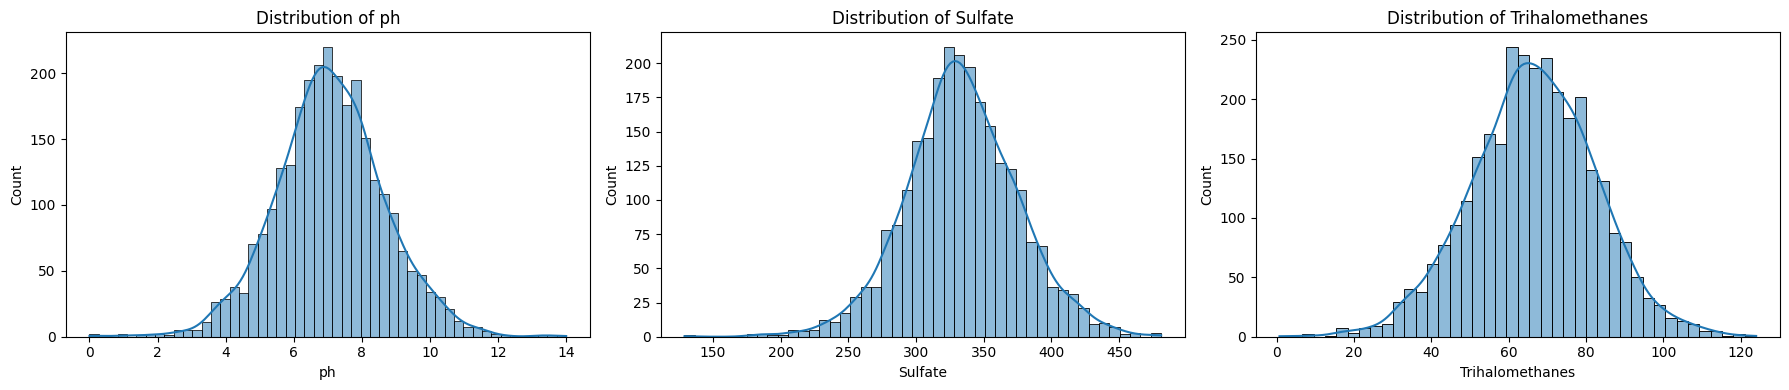

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['ph', 'Sulfate', 'Trihalomethanes']

fig, axes = plt.subplots(1, len(features), figsize=(18, 4))

for i, col in enumerate(features):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


### 3.2 Data Cleaning and Preprocessing

In [32]:

data['ph'] = data['ph'].fillna(data.groupby('Potability')['ph'].transform('mean'))
data['Sulfate'] = data['Sulfate'].fillna(data.groupby('Potability')['Sulfate'].transform('median'))
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data.groupby('Potability')['Trihalomethanes'].transform('mean'))

print(data[['ph', 'Sulfate', 'Trihalomethanes']].isnull().sum())

ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080855,1.469958,0.000000,6.277673,7.085378,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.544928,36.146829,129.000000,317.094638,333.389426,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.395671,15.769901,0.738000,56.647656,66.303555,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


### 3.3 Correlation Analysis

**Key Concept**: Correlation analysis helps identify which features are most strongly related to our target variable.

In [35]:
corr_matrix = data.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014742,0.017205,0.040092,0.003009,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092824,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149684,0.013831,0.010242,-0.008849,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023516,-0.020486,-0.012653,0.016615,0.002363,0.023779
Sulfate,0.014742,-0.092824,-0.149684,0.023516,1.000000,-0.014341,0.027567,-0.025891,-0.009550,-0.025339
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014341,1.000000,0.020966,0.001238,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027567,0.020966,1.000000,-0.012944,-0.027308,-0.030001
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025891,0.001238,-0.012944,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009550,0.005798,-0.027308,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.025339,-0.008128,-0.030001,0.007305,0.001581,1.000000


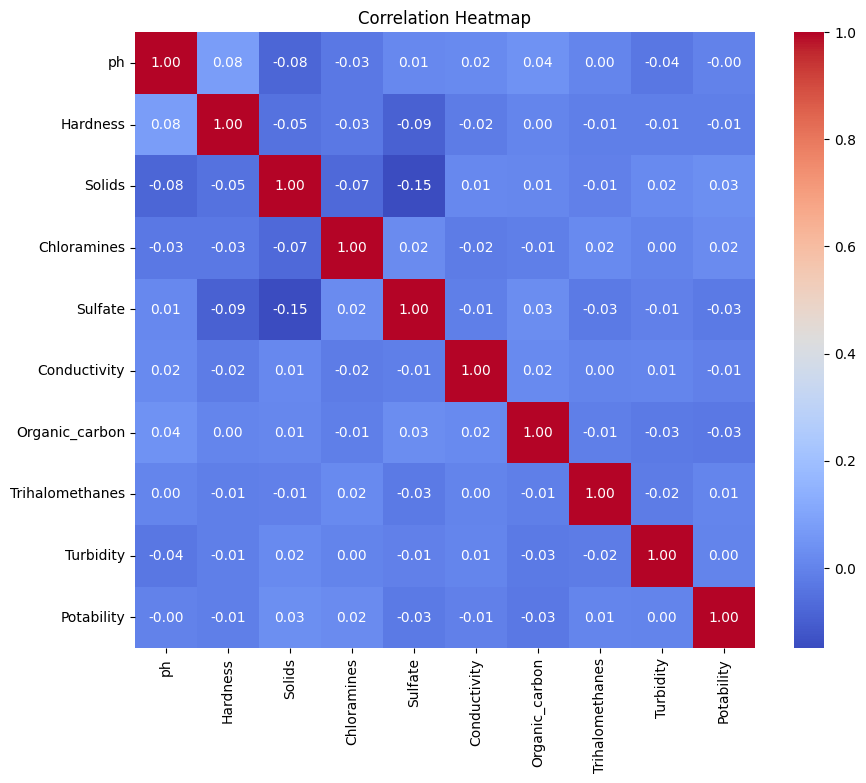

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Step 4: Data Exploration & Visualization

### Exploratory Data Analysis: Feature Distribution

Histograms were plotted for all numerical features to visualize their **data distribution**, **skewness**, and **presence of outliers**.

This visualization helps in understanding the spread and range of values before applying preprocessing and modeling techniques.


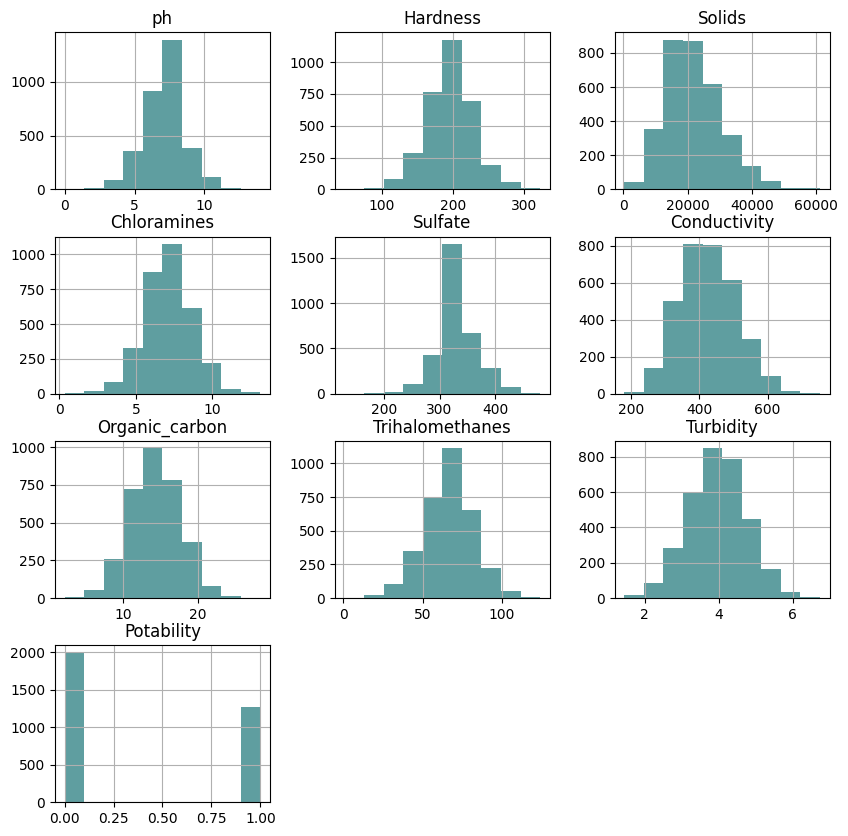

In [37]:
data_hist_plot = data.hist(figsize=(10, 10), color= "#5F9EA0")

<Axes: xlabel='Potability', ylabel='count'>

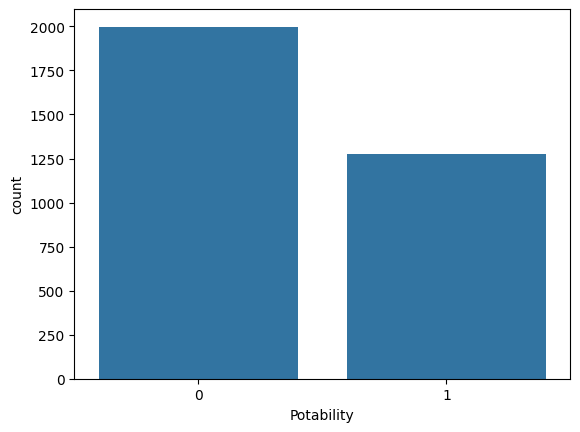

In [38]:
sns.countplot(x='Potability', data=data)

### 4.1 Target Variable: Potability

- **0** → Water is **not safe** for drinking  
- **1** → Water is **safe** for drinking  

The dataset shows an **imbalanced class distribution**, with non-potable samples being more frequent than potable ones.


In [39]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

### 4.2 Outlier Detection (IQR Method)

Outliers were identified using the IQR method for all numerical features.


In [40]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)
cols = data.select_dtypes(include='number').columns
# Check outliers for all numeric columns
for col in cols:
    num_outliers = count_outliers(data, col)
    print(f"{col}: {num_outliers} outliers")

ph: 142 outliers
Hardness: 83 outliers
Solids: 47 outliers
Chloramines: 61 outliers
Sulfate: 264 outliers
Conductivity: 11 outliers
Organic_carbon: 25 outliers
Trihalomethanes: 54 outliers
Turbidity: 19 outliers
Potability: 0 outliers


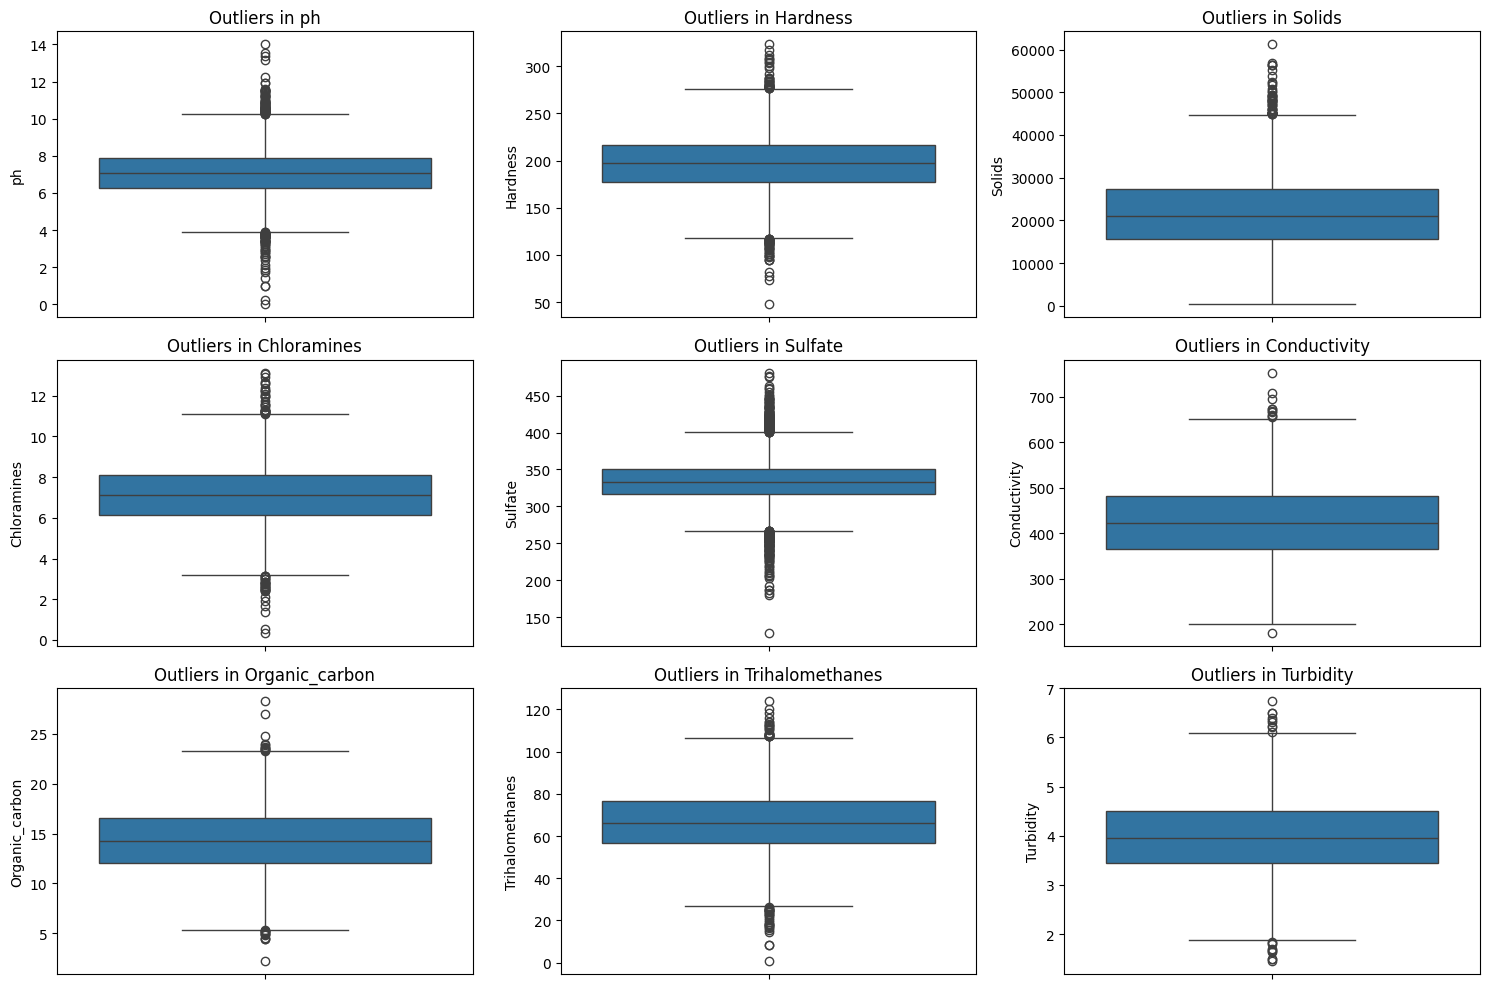

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots to see multiple columns at once
plt.figure(figsize=(15, 10))

# List of numeric columns (excluding Potability)
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
        'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for i, column in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Outliers in {column}')

plt.tight_layout()
plt.show()

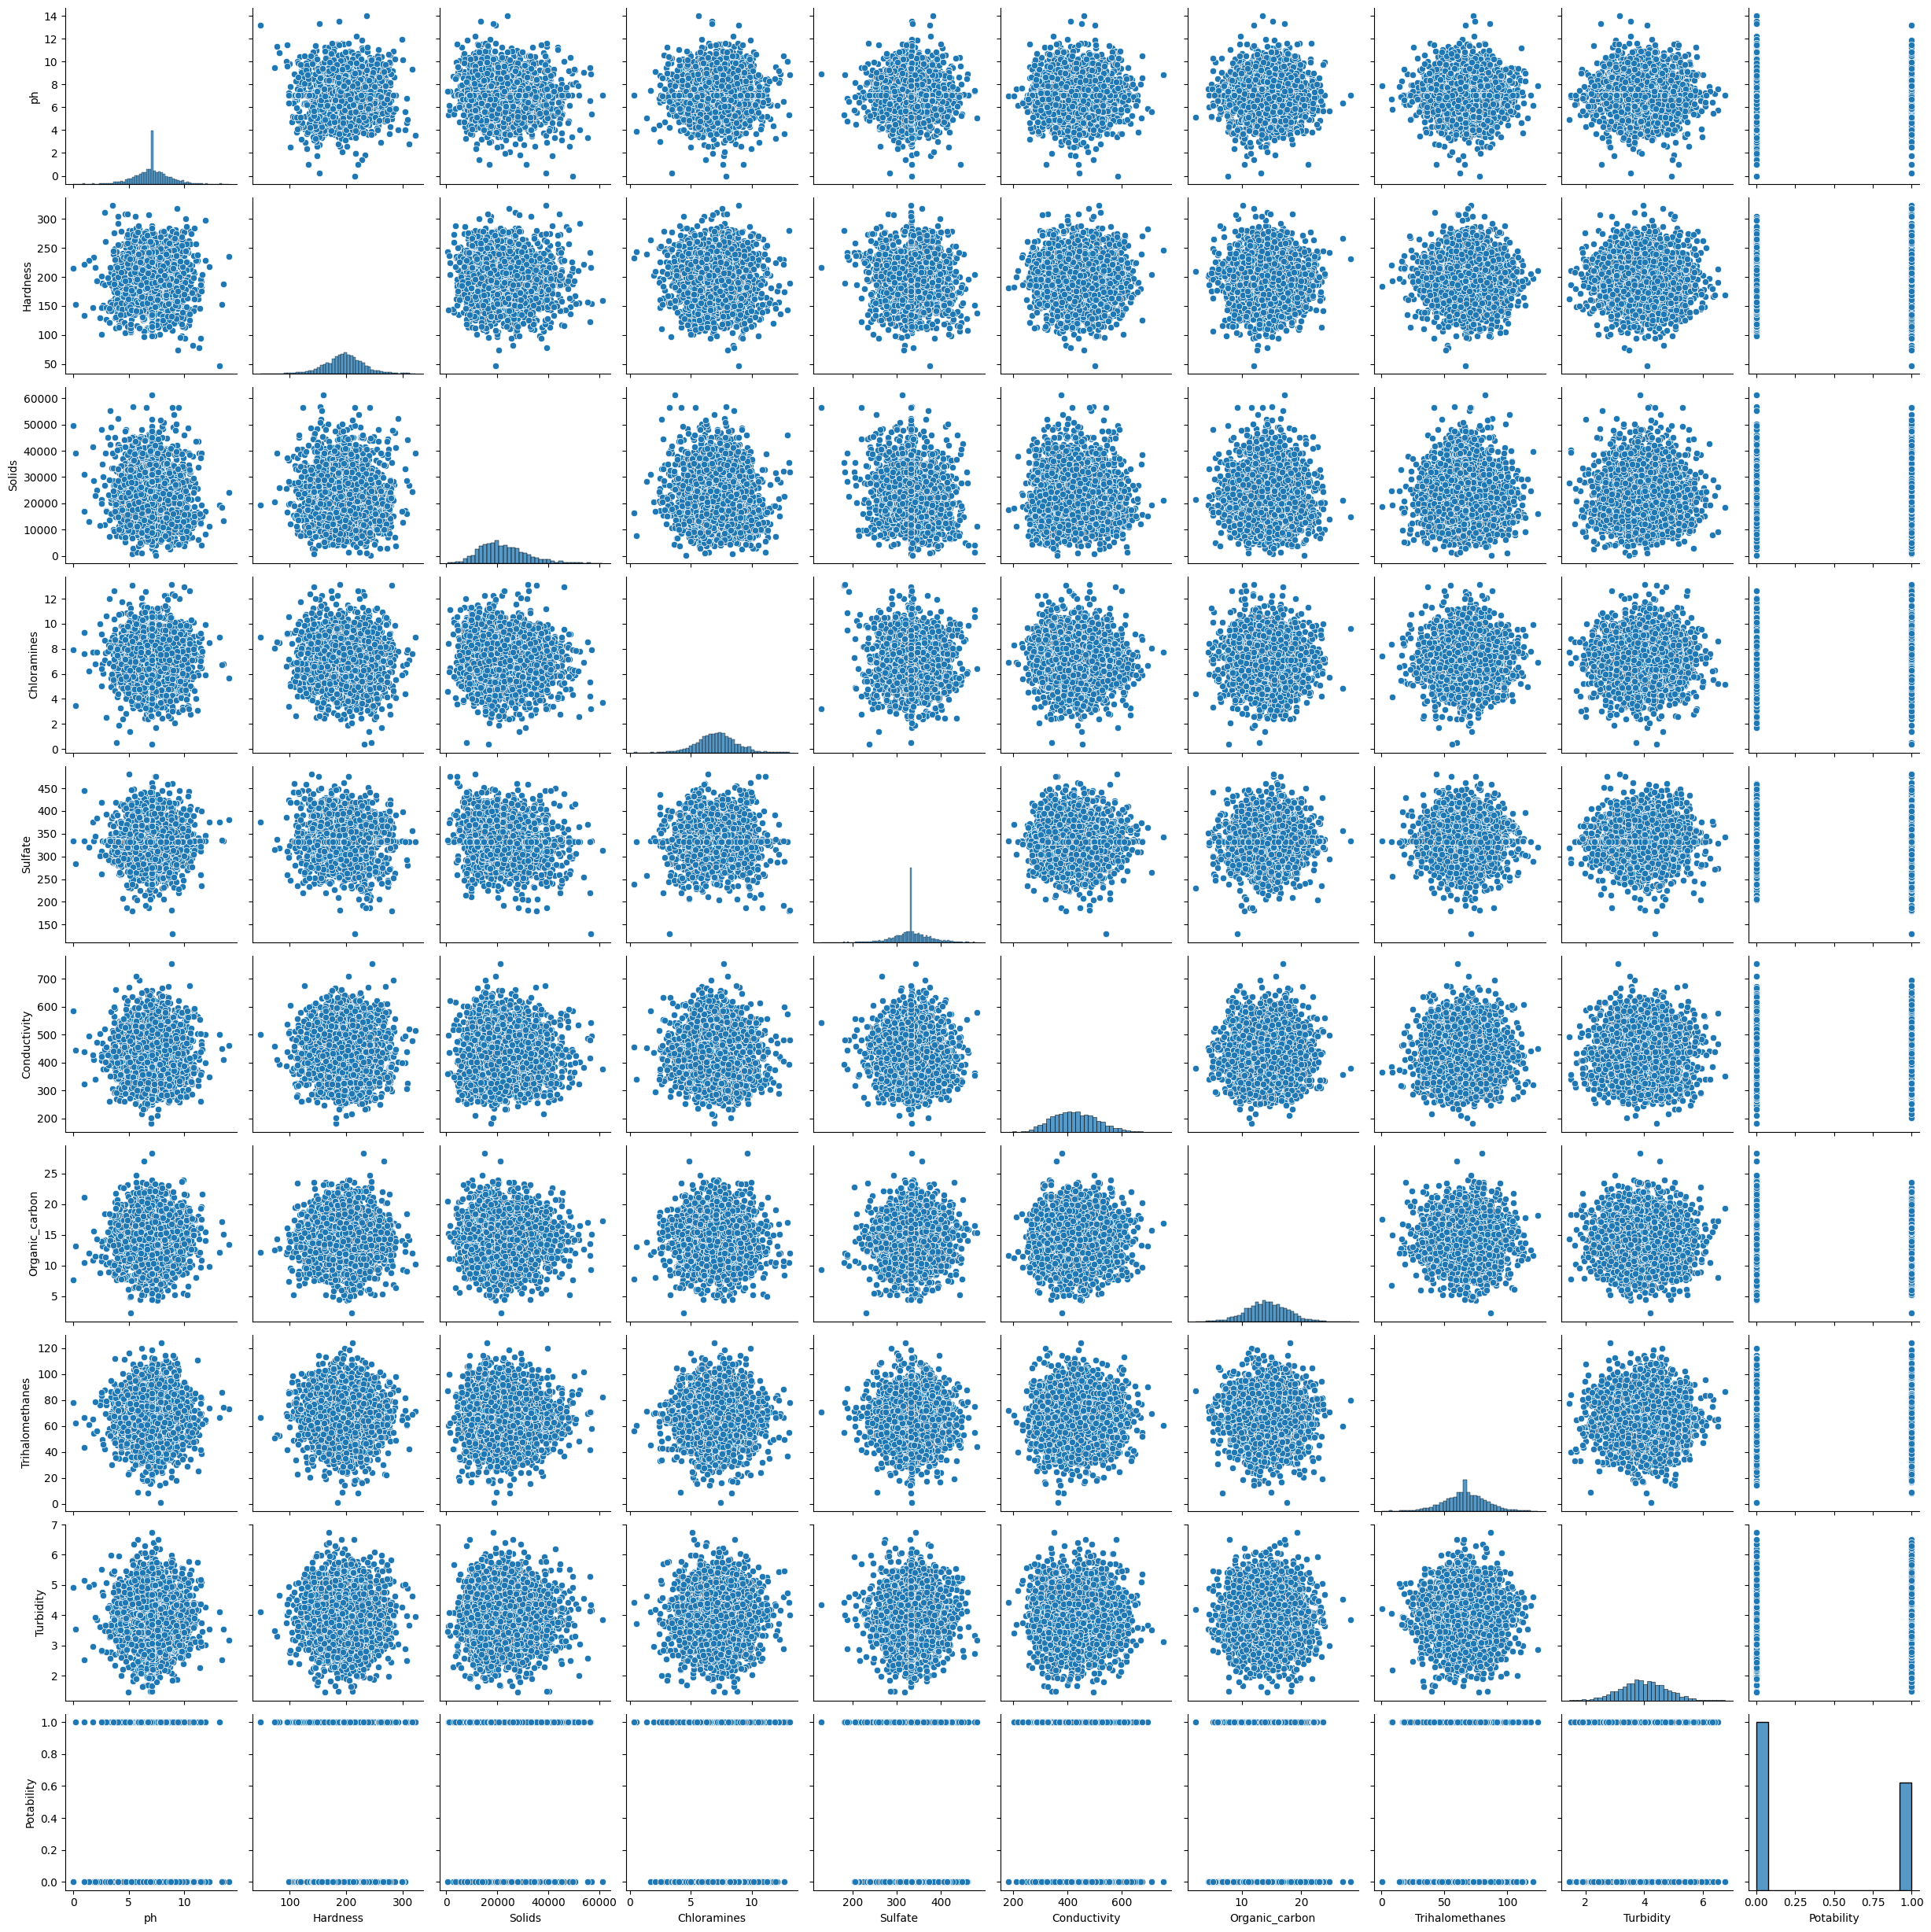

In [42]:
sns.pairplot(data)

### 4.3 Handling Outliers

Outliers were handled using the **percentile capping method**.

For each numerical feature:
- The **5th percentile** was used as the lower limit
- The **95th percentile** was used as the upper limit
- Values below the 5th percentile were capped to the lower limit
- Values above the 95th percentile were capped to the upper limit

This approach helps reduce the impact of extreme values while preserving the overall data distribution.


In [43]:
import numpy as np

# Function to cap outliers at specific percentiles
def handle_outliers(df, column):
    # Calculate 5th and 95th percentiles
    lower_limit = df[column].quantile(0.05)
    upper_limit = df[column].quantile(0.95)

    # Cap the values
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df

# Apply to all numeric columns
cols_to_fix = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
               'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for col in cols_to_fix:
    data = handle_outliers(data, col)

print("Outliers have been capped at the 5th and 95th percentiles.")

Outliers have been capped at the 5th and 95th percentiles.


### 4.4 Squared Feature Creation

Squared features were created to analyze non-linear correlations with Potability.


In [44]:
# Create squared features
data['ph_squared'] = data['ph'] ** 2
data['Sulfate_squared'] = data['Sulfate'] ** 2
data['Chloramines_squared'] = data['Chloramines'] ** 2

# Check the new correlation with Potability
new_corr = data[['ph', 'ph_squared', 'Sulfate', 'Sulfate_squared', 'Potability']].corr()
print(new_corr['Potability'])

ph                -0.004696
ph_squared        -0.012577
Sulfate           -0.019274
Sulfate_squared   -0.011142
Potability         1.000000
Name: Potability, dtype: float64


### 4.5 Correlation after Tranformation of Features

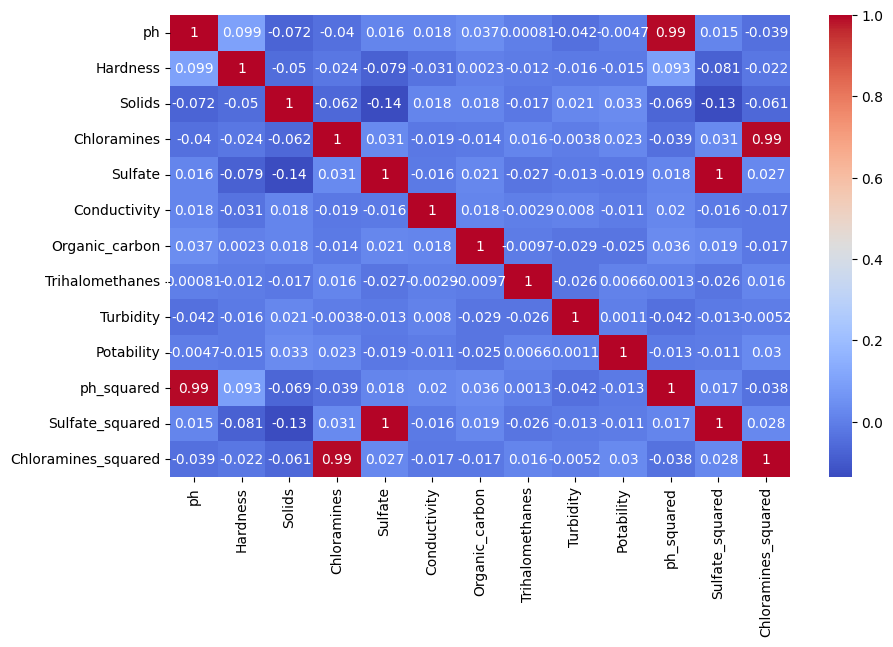

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


## Step 5: Machine Learning Model Development & Comparison

**Learning Objective**: Build and compare multiple machine learning models to predict **water potability**, and evaluate their performance to identify the most effective algorithm for classification.

**Algorithms Implemented:**
- Logistic Regression
- Support Vector Machine 
- Random Forest 
- Decision Tree 
- K-Nearest Neighbors (KNN)
- XGBoost (Advanced gradient boosting model)


### 5.1 Data Preparation for Machine Learning

**Key Concepts**: 

- **Train-test split**: Dividing data to train models and evaluate their performance on unseen data
- **Feature scaling**: Normalizing features to similar ranges for optimal algorithm performance
- **Handling Class Imbalance**: Balancing the data using SMOTE

In [46]:
X = data.drop('Potability', axis=1)
y = data['Potability']

In [47]:
%pip install scikit-learn imbalanced-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standard Scaling (fit only on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE on scaled training data only
smote = SMOTE(random_state=42)
X_train_final, y_train_final = smote.fit_resample(
    X_train_scaled, y_train
)

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.14.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached sklearn_compat-0.1.5-py3-none-any.whl.metadata (20 kB)
Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached imbalanced_learn-0.14.1-py3-none-any.whl (235 kB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached sklearn_compat-0.1.5-py3-none-any.whl (20 kB)

   ---------------------------------------- 0/5 [scipy]
   ---------------------------------------- 0/5 [scipy]
   ---------------------------------------- 0/5 [scipy]
   ---------------------------------------- 0/5 [scipy]
   ------------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:
X_train_final.shape, y_train_final.shape

((3196, 12), (3196,))

### 5.2 Model 1: Logistic Regression

**Key Concept**: Logistic Regression is a linear algorithm that's excellent for understanding feature relationships and providing baseline performance.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Cross-validation (accuracy)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_model, X_train_final, y_train_final, cv=cv, scoring='accuracy')
print("Logistic Regression CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit model on full training data
lr_model.fit(X_train_final, y_train_final)

# Predict on test data
y_pred = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

Logistic Regression CV Accuracy Scores: [0.55625    0.51799687 0.51017214 0.56025039 0.53208138]
Mean CV Accuracy: 0.5353501564945227


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluation
print("\n--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Logistic Regression Evaluation ---
Accuracy: 0.5701
Precision: 0.4555
Recall: 0.5195
F1-score: 0.4854

Confusion Matrix:
[[241 159]
 [123 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       400
           1       0.46      0.52      0.49       256

    accuracy                           0.57       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.57      0.57       656



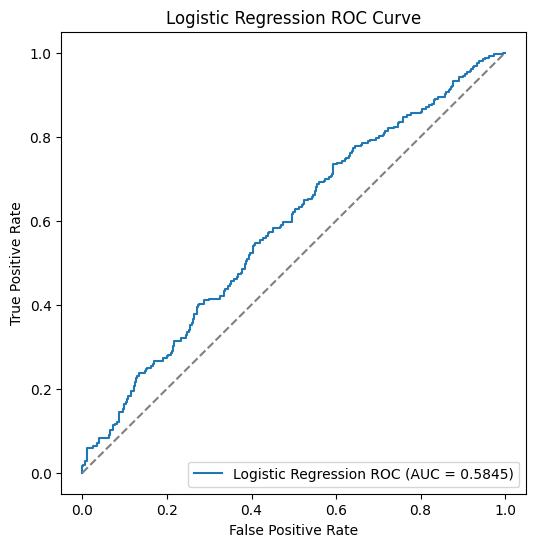

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
auc_score = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Logistic Regression ROC (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.show()


### 5.3 Model 2: Support Vector Machine (SVM)

**Key Concept**: SVM finds optimal decision boundaries by maximizing margins between classes, often achieving high accuracy on well-structured datasets.

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt

# Initialize SVM with probability estimates
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_svm = cross_val_score(
    svm_model, X_train_final, y_train_final, cv=cv, scoring='accuracy'
)



# Train on SMOTE-resampled, scaled training data
svm_model.fit(X_train_final, y_train_final)

# 3️⃣ Predict on scaled test data
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]  # probability for ROC/AUC


In [53]:
# 4️⃣ Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy:.4f}")
print(f"SVM Precision: {precision:.4f}")
print(f"SVM Recall: {recall:.4f}")
print(f"SVM F1-score: {f1:.4f}\n")

# 5️⃣ Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm), "\n")

# 6️⃣ Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6098
SVM Precision: 0.5000
SVM Recall: 0.5352
SVM F1-score: 0.5170

Confusion Matrix:
[[263 137]
 [119 137]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       400
           1       0.50      0.54      0.52       256

    accuracy                           0.61       656
   macro avg       0.59      0.60      0.59       656
weighted avg       0.61      0.61      0.61       656



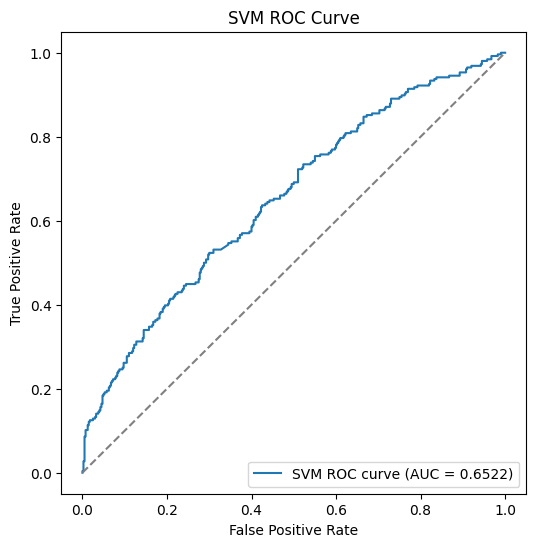

SVM AUC Score: 0.6522


In [54]:
# 7️⃣ ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
auc_score = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"SVM ROC curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"SVM AUC Score: {auc_score:.4f}")

### 5.4 Model 3: Random Forest

**Key Concept**: Random Forest is an ensemble method that combines multiple decision trees, providing robust predictions and feature importance rankings.

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

rf_model = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(
    rf_model, X_train_final, y_train_final, cv=cv, scoring='accuracy'
)

print("Random Forest CV Accuracy Scores:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())

rf_model.fit(X_train_final, y_train_final)

y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]


Random Forest CV Accuracy Scores: [0.815625   0.8028169  0.79968701 0.81064163 0.8028169 ]
Mean CV Accuracy: 0.8063174882629107


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Precision: {precision:.4f}")
print(f"Random Forest Recall: {recall:.4f}")
print(f"Random Forest F1-score: {f1:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf), "\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7851
Random Forest Precision: 0.7203
Random Forest Recall: 0.7344
Random Forest F1-score: 0.7273

Confusion Matrix:
[[327  73]
 [ 68 188]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       400
           1       0.72      0.73      0.73       256

    accuracy                           0.79       656
   macro avg       0.77      0.78      0.77       656
weighted avg       0.79      0.79      0.79       656



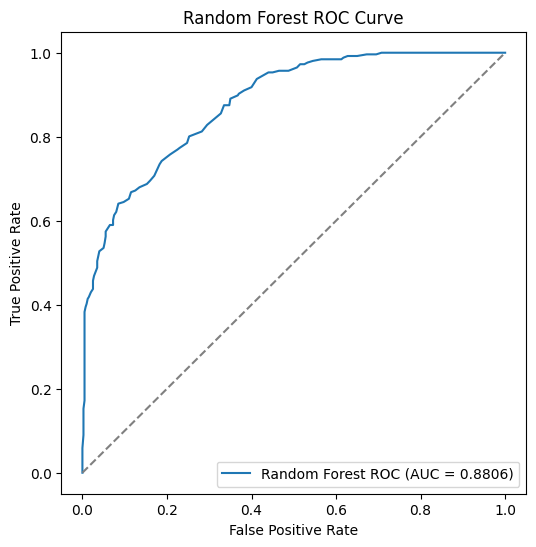

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_score = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Random Forest ROC (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show()


### 5.5 Model 4: Decision Tree Classifier

**Core Algorithm**: The Decision Tree is a fundamental supervised learning algorithm that models decisions using a tree-like structure.  
It is easy to interpret and helps understand how feature-based splits lead to predictions.

This model provides a strong baseline for understanding feature importance and decision boundaries in the water potability classification task.


In [58]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

cv_scores_dt = cross_val_score(
    dt_model, X_train_final, y_train_final, cv=cv, scoring='accuracy'
)

print("Decision Tree CV Accuracy Scores:", cv_scores_dt)
print("Mean CV Accuracy:", cv_scores_dt.mean())

dt_model.fit(X_train_final, y_train_final)

y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]


Decision Tree CV Accuracy Scores: [0.765625   0.74021909 0.76525822 0.72300469 0.75743349]
Mean CV Accuracy: 0.7503080985915493


In [59]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(f"Decision Tree Precision: {precision:.4f}")
print(f"Decision Tree Recall: {recall:.4f}")
print(f"Decision Tree F1-score: {f1:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt), "\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7378
Decision Tree Precision: 0.6544
Decision Tree Recall: 0.6953
Decision Tree F1-score: 0.6742

Confusion Matrix:
[[306  94]
 [ 78 178]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       400
           1       0.65      0.70      0.67       256

    accuracy                           0.74       656
   macro avg       0.73      0.73      0.73       656
weighted avg       0.74      0.74      0.74       656



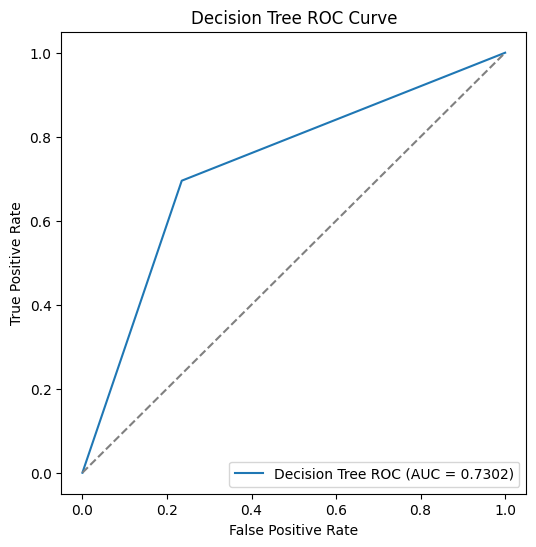

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
auc_score = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Decision Tree ROC (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend(loc="lower right")
plt.show()

### 5.6 Model 5: XGBoost (Advanced/Optional)

**⚠️ Advanced Content**: XGBoost is a sophisticated gradient boosting framework. This section is optional for intermediate learners but valuable for understanding state-of-the-art ensemble methods.

In [61]:
%pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

cv_scores_xgb = cross_val_score(
    xgb_model, X_train_final, y_train_final, cv=cv, scoring='accuracy'
)

print("XGBoost CV Accuracy Scores:", cv_scores_xgb)
print("Mean CV Accuracy:", cv_scores_xgb.mean())

xgb_model.fit(X_train_final, y_train_final)

y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)
Note: you may need to restart the kernel to use updated packages.
XGBoost CV Accuracy Scores: [0.8015625  0.79499218 0.81377152 0.80751174 0.81533646]
Mean CV Accuracy: 0.8066348787167449


In [62]:
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Precision: {precision:.4f}")
print(f"XGBoost Recall: {recall:.4f}")
print(f"XGBoost F1-score: {f1:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb), "\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7683
XGBoost Precision: 0.7016
XGBoost Recall: 0.7070
XGBoost F1-score: 0.7043

Confusion Matrix:
[[323  77]
 [ 75 181]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       400
           1       0.70      0.71      0.70       256

    accuracy                           0.77       656
   macro avg       0.76      0.76      0.76       656
weighted avg       0.77      0.77      0.77       656



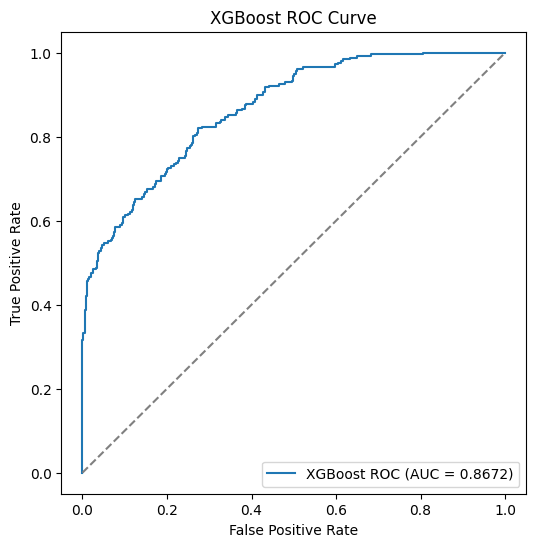

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
auc_score = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"XGBoost ROC (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend(loc="lower right")
plt.show()

### 5.7 Model 6: K-Nearest Neighbors (KNN)

**Core Algorithm**: KNN is an instance-based learning algorithm that classifies data points based on the majority class of their nearest neighbors.  
It is simple yet effective for capturing local patterns in the dataset.

This model is useful for analyzing how proximity-based relationships influence water potability prediction.


In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

cv_scores_knn = cross_val_score(
    knn_model, X_train_final, y_train_final, cv=cv, scoring='accuracy'
)

print("KNN CV Accuracy Scores:", cv_scores_knn)
print("Mean CV Accuracy:", cv_scores_knn.mean())

knn_model.fit(X_train_final, y_train_final)

y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]


KNN CV Accuracy Scores: [0.6828125  0.64788732 0.68544601 0.66823161 0.66823161]
Mean CV Accuracy: 0.6705218114241002


In [65]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN Precision: {precision:.4f}")
print(f"KNN Recall: {recall:.4f}")
print(f"KNN F1-score: {f1:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn), "\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.5595
KNN Precision: 0.4441
KNN Recall: 0.5117
KNN F1-score: 0.4755

Confusion Matrix:
[[236 164]
 [125 131]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       400
           1       0.44      0.51      0.48       256

    accuracy                           0.56       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.57      0.56      0.56       656



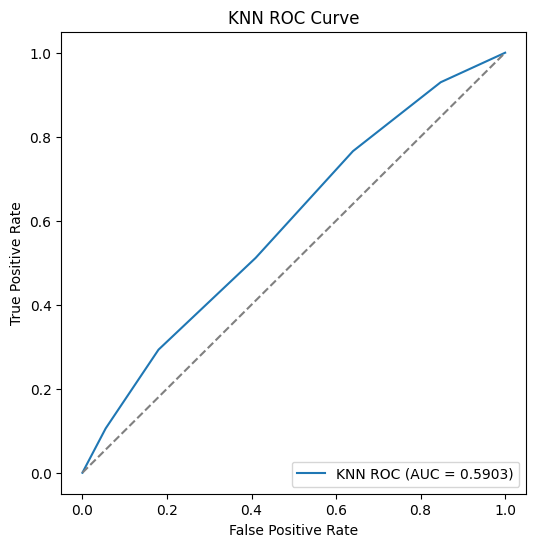

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
auc_score = roc_auc_score(y_test, y_prob_knn)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"KNN ROC (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Step 6: Comprehensive Model Comparison

In [67]:
from sklearn.metrics import accuracy_score

model_test_accuracy = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

for model, score in model_test_accuracy.items():
    print(f"{model}: {score:.4f}")


Logistic Regression: 0.5701
SVM: 0.6098
Random Forest: 0.7851
Decision Tree: 0.7378
KNN: 0.5595
XGBoost: 0.7683


In [68]:
model_cv_scores = {
    "Logistic Regression": cv_scores.mean(),
    "SVM": cv_scores_svm.mean(),
    "Random Forest": cv_scores_rf.mean(),
    "Decision Tree": cv_scores_dt.mean(),
    "KNN": cv_scores_knn.mean(),
    "XGBoost": cv_scores_xgb.mean()
}

for model, score in model_cv_scores.items():
    print(f"{model}: {score:.4f}")


Logistic Regression: 0.5354
SVM: 0.6715
Random Forest: 0.8063
Decision Tree: 0.7503
KNN: 0.6705
XGBoost: 0.8066


## Hyperparameter Tuning using GridSearchCV for RandomForest

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initializing the Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1, # Uses all available processors
    scoring='accuracy',
    verbose=1
)

In [70]:
# Fitting the grid search to the balanced training data
print("Starting Grid Search...")
grid_search.fit(X_train_scaled, y_train)

# Extracting the best model and parameters
final_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters Found: {best_params}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Starting Grid Search...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters Found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.7947


In [71]:
from sklearn.metrics import accuracy_score

y_pred = final_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.7972560975609756


## Hyperparameter Tuning using RandomSearchCV for DecisionTree

In [72]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(5, 101, 5)),   
    'min_samples_split': list(np.arange(2, 21, 2)),   
    'min_samples_leaf': list(np.arange(1, 11))      
}

random_search_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,             
    scoring='accuracy',     
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)
print("Starting Randomized Search...")
random_search_dt.fit(X_train_final, y_train_final)

best_dt = random_search_dt.best_estimator_

print("Best Parameters Found:", random_search_dt.best_params_)
print("Best Cross-Validation Score:", random_search_dt.best_score_)


Starting Randomized Search...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters Found: {'min_samples_split': np.int64(12), 'min_samples_leaf': np.int64(3), 'max_depth': np.int64(80), 'criterion': 'entropy'}
Best Cross-Validation Score: 0.7443613067292644


In [73]:
from sklearn.metrics import accuracy_score

y_pred = best_dt.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.7286585365853658


## Hyperparameter Tuning using RandomSearchCV for RandomForest

In [74]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': list(np.arange(100, 501, 50)),      
    'max_depth': [None] + list(np.arange(5, 51, 5)),    
    'min_samples_split': list(np.arange(2, 21, 2)),   
    'min_samples_leaf': list(np.arange(1, 11)),        
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


In [75]:
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=100,                 
    scoring='roc_auc',        
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [76]:
print("Starting Randomized Search for Random Forest...")
random_search_rf.fit(X_train_final, y_train_final)

Starting Randomized Search for Random Forest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'max_depth': [None, np.int64(5), ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [np.int64(1), np.int64(2), ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",100
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation

In [77]:
best_rf = random_search_rf.best_estimator_

print("Best Parameters Found:", random_search_rf.best_params_)
print("Best Cross-Validation Score:", random_search_rf.best_score_)

Best Parameters Found: {'n_estimators': np.int64(300), 'min_samples_split': np.int64(8), 'min_samples_leaf': np.int64(1), 'max_features': 'log2', 'max_depth': np.int64(25), 'bootstrap': False}
Best Cross-Validation Score: 0.9056973574647336


## Hyperparameter Tuning using RandomSearchCV for XGBClassifier

In [78]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [79]:
param_distributions = {
    'n_estimators': list(np.arange(300, 1000, 100)),      
    'max_depth': list(np.arange(3, 11)),                
    'learning_rate': np.linspace(0.01, 0.3, 10),        
    'subsample': np.linspace(0.6, 1.0, 5),              
    'colsample_bytree': np.linspace(0.6, 1.0, 5),      
    'gamma': np.linspace(0, 5, 6),                      
    'min_child_weight': [1, 3, 5, 7]
}

In [80]:
random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    ),
    param_distributions=param_distributions,
    n_iter=100,              
    scoring='roc_auc',     
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [81]:
print("Starting Randomized Search for XGBoost...")
random_search_xgb.fit(X_train_final, y_train_final)

Starting Randomized Search for XGBoost...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:199: UserWarning: [02:13:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'colsample_bytree': array([0.6, 0....8, 0.9, 1. ]), 'gamma': array([0., 1...., 3., 4., 5.]), 'learning_rate': array([0.01 ..., 0.3 ]), 'max_depth': [np.int64(3), np.int64(4), ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",100
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the

In [82]:
best_xgb = random_search_xgb.best_estimator_

print("Best Parameters Found:", random_search_xgb.best_params_)
print("Best Cross-Validation Score:", random_search_xgb.best_score_)

Best Parameters Found: {'subsample': np.float64(0.7), 'n_estimators': np.int64(300), 'min_child_weight': 3, 'max_depth': np.int64(10), 'learning_rate': np.float64(0.042222222222222223), 'gamma': np.float64(0.0), 'colsample_bytree': np.float64(1.0)}
Best Cross-Validation Score: 0.90033208635384


### Model Comparsion after Hyperparameter Tuning

In [83]:
import pandas as pd

# Dynamically fetching the best scores from your search objects
# Note: Ensure you have already called .fit() on these objects
results_data = {
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost'],
    'Best CV Accuracy': [
        random_search_rf.best_score_, 
        random_search_dt.best_score_, 
        random_search_xgb.best_score_
    ]
}

# Create the DataFrame
df_results = pd.DataFrame(results_data)

# Sort the results so the best performing model is at the top
df_results = df_results.sort_values(by='Best CV Accuracy', ascending=False).reset_index(drop=True)

best_model = df_results.iloc[0]

df_results['Best CV Accuracy (%)'] = (
    df_results['Best CV Accuracy'] * 100
).round(2)

df_results = df_results.drop(columns=['Best CV Accuracy'])
df_results

# Add rank
df_results['Rank'] = df_results.index + 1

# Mark the best model
df_results['Best Model'] = df_results['Rank'].apply(
    lambda x: 'Highest Accuracy' if x == 1 else " "
)

df_results

,Model,Best CV Accuracy (%),Rank,Best Model
0,Random Forest,90.57,1,Highest Accuracy
1,XGBoost,90.03,2,
2,Decision Tree,74.44,3,
